## Module 4 Homework

## load Dataset

In [124]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')

In [126]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [127]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [128]:
categorical= df.dtypes[df.dtypes == 'object'].index.to_list()
numerical  = df.dtypes[df.dtypes != 'object'].index.to_list()
numerical.remove('converted')

In [129]:
df[numerical]   = df[numerical].fillna(0)
df[categorical] = df[categorical].fillna('NA')

## Split the dataset

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
full_train,df_test = train_test_split(df        ,test_size=0.2  , random_state=1)
df_train  ,df_val  = train_test_split(full_train,test_size= 0.25, random_state=1)

## Question 1 - AUC for feature importance

In [132]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [133]:
for col in numerical:
    auc = roc_auc_score(df_train.converted,df_train[col])
    print(col,auc)

number_of_courses_viewed 0.7635680590007088
annual_income 0.5519578313253012
interaction_count 0.738270176293409
lead_score 0.6144993577250176


The Highest AUC in number_of_course_viewed

## Question 2 - Training the model

In [193]:
def train(df_train, y_train,C=1):
    dicts_train= df_train[categorical+ numerical].to_dict(orient='records')
    dv         = DictVectorizer(sparse = False)
    X_train    = dv.fit_transform(dicts_train)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train,y_train)
    return model , dv

In [135]:
def predict(df_val, model, dv):
    dicts_val= df_val[categorical+ numerical].to_dict(orient='records')
    X_val    =  dv.transform(dicts_val)

    y_pred   = model.predict_proba(X_val)[:, 1]
    return y_pred
    

In [136]:
y_train  = df_train['converted'].values
y_val  = df_val['converted'].values

model,dv = train(df_train,y_train)

In [137]:
y_pred = predict(df_val,model,dv)

/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [138]:
auc = roc_auc_score(y_val,y_pred)
auc.round(3)

np.float64(0.817)

In [139]:
fpr,tpr,t = roc_curve(y_val,y_pred)

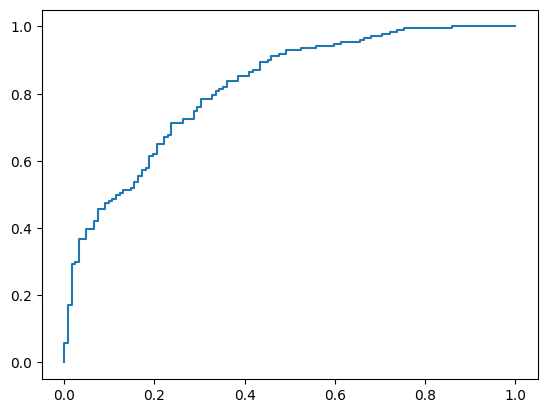

In [140]:
plt.plot(fpr,tpr)

## Question 3 - Precision and Recall

In [151]:
thresholds = np.linspace(0,1,101)

0.0 0.5836177474402731 1.0
0.01 0.5836177474402731 1.0
0.02 0.5836177474402731 1.0
0.03 0.5836177474402731 1.0
0.04 0.5836177474402731 1.0
0.05 0.5836177474402731 1.0
0.06 0.5836177474402731 1.0
0.07 0.5836177474402731 1.0
0.08 0.5836177474402731 1.0
0.09 0.5836177474402731 1.0
0.1 0.5836177474402731 1.0
0.11 0.5836177474402731 1.0
0.12 0.5836177474402731 1.0
0.13 0.5836177474402731 1.0
0.14 0.5836177474402731 1.0
0.15 0.5836177474402731 1.0
0.16 0.5836177474402731 1.0
0.17 0.5836177474402731 1.0
0.18 0.5836177474402731 1.0
0.19 0.5836177474402731 1.0
0.2 0.5836177474402731 1.0
0.21 0.5836177474402731 1.0
0.22 0.5836177474402731 1.0
0.23 0.5836177474402731 1.0
0.24 0.5836177474402731 1.0
0.25 0.5836177474402731 1.0
0.26 0.5836177474402731 1.0
0.27 0.5856164383561644 1.0
0.28 0.5876288659793815 1.0
0.29 0.5896551724137931 1.0
0.3 0.5896551724137931 1.0
0.31 0.5896551724137931 1.0
0.32 0.5916955017301038 1.0
0.33 0.5916955017301038 1.0
0.34 0.59375 1.0
0.35000000000000003 0.59375 1.0
0.3

/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

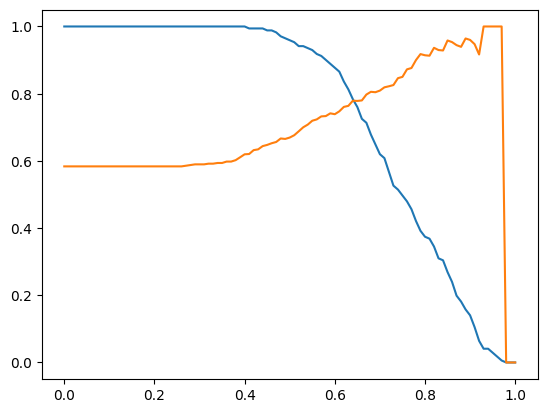

In [152]:
precision = []
recall    = []
for t in thresholds:
    y_p = (y_pred >= t).astype(int)
    p = precision_score(y_val,y_p)
    r = recall_score(y_val, y_p)
    precision.append(p)
    recall.append(r)
    print(t,p,r)

plt.plot(thresholds,recall)
plt.plot(thresholds, precision)


## Question 4 - F1 score

0.0 0.7606382978723404 0.6137339055793991 1.0
0.01 0.7606382978723404 0.6137339055793991 1.0
0.02 0.7606382978723404 0.6137339055793991 1.0
0.03 0.7606382978723404 0.6137339055793991 1.0
0.04 0.7606382978723404 0.6137339055793991 1.0
0.05 0.7606382978723404 0.6137339055793991 1.0
0.06 0.7606382978723404 0.6137339055793991 1.0
0.07 0.7606382978723404 0.6137339055793991 1.0
0.08 0.7606382978723404 0.6137339055793991 1.0
0.09 0.7606382978723404 0.6137339055793991 1.0
0.1 0.7606382978723404 0.6137339055793991 1.0
0.11 0.7606382978723404 0.6137339055793991 1.0
0.12 0.7606382978723404 0.6137339055793991 1.0
0.13 0.7606382978723404 0.6137339055793991 1.0
0.14 0.7606382978723404 0.6137339055793991 1.0
0.15 0.7606382978723404 0.6137339055793991 1.0
0.16 0.7606382978723404 0.6137339055793991 1.0
0.17 0.7606382978723404 0.6137339055793991 1.0
0.18 0.7606382978723404 0.6137339055793991 1.0
0.19 0.7606382978723404 0.6137339055793991 1.0
0.2 0.7606382978723404 0.6137339055793991 1.0
0.21 0.760638297

/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

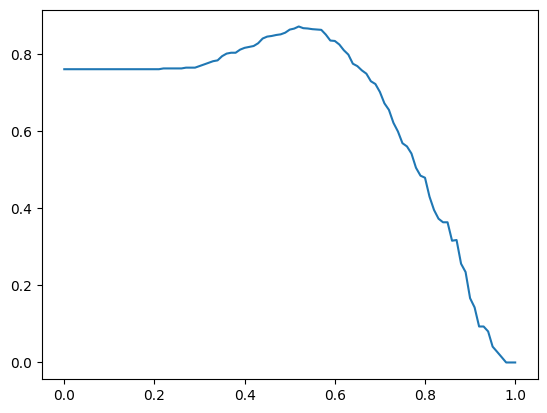

In [184]:
f1_score = []
for t in thresholds:
    y_p = (y_pred >= t).astype(int)
    p = precision_score(y_val,y_p)
    r = recall_score(y_val, y_p)
    if (p + r) == 0:
        f1 = 0
    else:
        f1 = 2 * (p * r) / (p + r)
    f1_score.append(f1)
    print(t,f1,p,r)

plt.plot(thresholds,f1_score)


## Question 5 - 5-Fold CV

In [188]:
from sklearn.model_selection import KFold

In [191]:
kfold = KFold(n_splits=5, shuffle=True, random_state = 1)

In [192]:
score = []
for train_idx, val_idx in kfold.split(full_train):
    train_set = full_train.iloc[train_idx]
    val_set   = full_train.iloc[val_idx]
    
    y_train = train_set['converted'].values
    y_val   = val_set['converted'].values
    
    model, dv = train(train_set, y_train)
    y_pred    = predict(val_set,model,dv)

    auc = roc_auc_score(y_val,y_pred)
    score.append(auc)
    print(auc)
print(np.mean(score),np.std(score))

0.8060745924216483
0.8713738368910783
0.7754320118852139
0.8018368617683685
0.8558272713202291
0.8221089148573075 0.03580711942905165


/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/adhamsmacbook/Library/Python/3.9/li

## Question 6 -  Hyperparameter Tuning

In [203]:
C = [0.000001, 0.001, 1]
final = []
for c in C:
    score = []
    for train_idx, val_idx in kfold.split(full_train):
        train_set = full_train.iloc[train_idx]
        val_set   = full_train.iloc[val_idx]
        
        y_train = train_set['converted'].values
        y_val   = val_set['converted'].values
        
        model, dv = train(train_set, y_train,C=c)
        y_pred    = predict(val_set,model,dv)
    
        auc = roc_auc_score(y_val,y_pred)
        score.append(auc)
    final.append((np.mean(score).round(3),np.std(score).round(3)))
print(final)

[(np.float64(0.56), np.float64(0.024)), (np.float64(0.867), np.float64(0.029)), (np.float64(0.822), np.float64(0.036))]


/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/adhamsmacbook/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/adhamsmacbook/Library/Python/3.9/li